# EECS 731 Assignment 1

Traveling the world on a mission to discover new data
1. Set up a data science project structure in a new git repository in your GitHub account
2. Install Jupyter notebook prerequisites (Anaconda, Python, etc.)
3. Select an industry
4. Select two to three public data sets from that industry
5. Load the data sets into panda data frames following the 10 minutes to pandas guide
6. Formulate one or two ideas on how the data sets could be combined to establish additional value using exploratory data analysis
7. Transform the data sets into a single data set while following data preparation processes to clean and transform features (use pandas documentation for help)
8. Document your process and results
9. Commit your notebook, source code, visualizations and other supporting files to the git repository in GitHub

## Industry and Datasets:
I selected Real estate Industry for data wrangling and exploratory data analysis. Selecting right features is crucial for property price prediction task. Property price may not only depend upon the characteristics of property like location, amenities, size but also other features like pollution and crime rate.

In this work, I have selected two public datasets related to the property sales and crime rate in the state Connecticut, USA. I intend to combine these datasets to analyze whether property price is correlated with crime rate for a given place and time. During this process, I will use data cleaning, feature transformation and data faceting techniques using pandas framework.

### Datasets:
#### Real_Estate_Sales_2001-2017.zip (https://catalog.data.gov/dataset/real-estate-sales-2001-2016)
#### crimeindex_connecticut.csv (http://data.ctdata.org/dataset/ucr-crime-index)

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Exploring the datasets to find the common feature to join

In [2]:
#reading first dataset
realstateDf = pd.read_csv('../data/Real_Estate_Sales_2001-2017.zip')
realstateDf.head(5)

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,Remarks
0,815906,170177,2017,04/05/1999 12:00:00 AM,New London,293 PEQUOT AVE,132440.0,252500.0,0.525000,NaN,Two Family,NaN,NaN
1,2,900035,2009,07/20/2010 12:00:00 AM,Andover,1 DOGWOOD DRIVE,55600.0,99000.0,0.561616,Vacant Land,NaN,NaN,NaN
2,3,14011,2014,01/14/2015 12:00:00 AM,Andover,1 JUROVATY LANE,153100.0,190000.0,0.805789,Residential,Single Family,NaN,NaN
3,4,80009,2008,01/21/2009 12:00:00 AM,Andover,1 ROSE LANE,116600.0,138900.0,0.839453,Residential,Single Family,NaN,NaN
4,5,15006,2015,11/30/2015 12:00:00 AM,Andover,1 ROSE LANE,102900.0,50000.0,2.058000,Residential,Single Family,14 - Foreclosure,PROPERTY WAS OWNED BY THE BANK


In [3]:
#reading second dataset
crimeDf = pd.read_csv('../data/crimeindex_connecticut.csv')
crimeDf.head(5)

,Town,FIPS,Year,Crime Type,Measure Type,Variable,Value
0,Andover,901301080,2010,Total Crime,Number,Crime Index,35.0
1,Andover,901301080,2010,Total Crime,"Rate (per 100,000)",Crime Index,1098.6
2,Andover,901301080,2010,Total Violent Crime,Number,Crime Index,1.0
3,Andover,901301080,2010,Total Violent Crime,"Rate (per 100,000)",Crime Index,31.4
4,Andover,901301080,2010,Total Property Crime,Number,Crime Index,34.0


#### Analysis
Observing the two datasets, we can join them using `Town` and `Year`(`ListYear`) features. We need to determine the similarities between these features in these two datasets.

In [4]:
#calculating minimum and maximum year 
minListYear = realstateDf['ListYear'].min()
maxListYear = realstateDf['ListYear'].max()
print("The minimum and maximum year for real estate dataset is {}, {}".format(minListYear,maxListYear))

minYear = crimeDf['Year'].min()
maxYear = crimeDf['Year'].max()
print("The minimum and maximum year for crime dataset is {}, {}".format(minYear,maxYear))

The minimum and maximum year for real estate dataset is 2001, 2017
The minimum and maximum year for crime dataset is 2010, 2017


To match these two features, we will filter out the information from 2001 to 2009 of real estate dataset.  

In [5]:
filteredRsDf = realstateDf[realstateDf.ListYear > 2009]
filteredRsDf.head(5)

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,Remarks
0,815906,170177,2017,04/05/1999 12:00:00 AM,New London,293 PEQUOT AVE,132440.0,252500.0,0.525000,NaN,Two Family,NaN,NaN
2,3,14011,2014,01/14/2015 12:00:00 AM,Andover,1 JUROVATY LANE,153100.0,190000.0,0.805789,Residential,Single Family,NaN,NaN
4,5,15006,2015,11/30/2015 12:00:00 AM,Andover,1 ROSE LANE,102900.0,50000.0,2.058000,Residential,Single Family,14 - Foreclosure,PROPERTY WAS OWNED BY THE BANK
6,815907,173165,2017,08/01/2001 12:00:00 AM,Shelton,28 SUNSET DR,126980.0,238000.0,0.534000,NaN,Single Family,NaN,NaN
11,12,13021,2013,06/16/2014 12:00:00 AM,Andover,10 HICKORY HILL DR,109400.0,165000.0,0.663000,Residential,Single Family,NaN,NaN


Finding Distinct Towns in two datasets

In [6]:
distinctTownsRsDf = filteredRsDf.Town.unique()
print(len(distinctTownsRsDf))
distinctTownsCrimeDf = crimeDf.Town.unique()
print(len(distinctTownsCrimeDf))
commonTowns = list(set(distinctTownsRsDf) & set(distinctTownsCrimeDf))
print(commonTowns)
len(commonTowns)

169
170
['Killingly', 'Wethersfield', 'Columbia', 'Woodstock', 'Essex', 'Groton', 'New Hartford', 'Colchester', 'Vernon', 'Southbury', 'New Haven', 'Lyme', 'Franklin', 'East Lyme', 'Berlin', 'Marlborough', 'Pomfret', 'Kent', 'Somers', 'Voluntown', 'Eastford', 'Killingworth', 'Coventry', 'Plainville', 'Windsor Locks', 'Tolland', 'Derby', 'Warren', 'Madison', 'Lisbon', 'Ashford', 'Beacon Falls', 'New Milford', 'North Haven', 'Norwalk', 'West Hartford', 'Old Saybrook', 'Ridgefield', 'Hartford', 'Farmington', 'Orange', 'Danbury', 'East Haven', 'Sherman', 'Woodbridge', 'Woodbury', 'Middlebury', 'East Haddam', 'Sprague', 'Hamden', 'Harwinton', 'Litchfield', 'Guilford', 'Norfolk', 'Willington', 'Oxford', 'West Haven', 'Thomaston', 'Morris', 'East Granby', 'Barkhamsted', 'Norwich', 'Bridgeport', 'Southington', 'Hartland', 'North Stonington', 'Putnam', 'Preston', 'Lebanon', 'Westbrook', 'Bozrah', 'Brooklyn', 'Middletown', 'Plymouth', 'Bethel', 'Goshen', 'Andover', 'Milford', 'Wilton', 'Fairfiel

169

In [7]:
townsMissingCrimeData = list(set(distinctTownsRsDf) - set(distinctTownsCrimeDf))
print(townsMissingCrimeData)

[]


It is seen that all the towns present in real estate dataset are present in crime dataset making join feasible for our purpose. 

#### Feature Transformation
In the crime dataset, the features are needed to be transformed because the information about crime type and measure type is given in different rows for the same town and year as shown below. 

In [8]:
crimeDf[(crimeDf.Town == 'Andover') & (crimeDf.Year == 2010)]

,Town,FIPS,Year,Crime Type,Measure Type,Variable,Value
0,Andover,901301080,2010,Total Crime,Number,Crime Index,35.0
1,Andover,901301080,2010,Total Crime,"Rate (per 100,000)",Crime Index,1098.6
2,Andover,901301080,2010,Total Violent Crime,Number,Crime Index,1.0
3,Andover,901301080,2010,Total Violent Crime,"Rate (per 100,000)",Crime Index,31.4
4,Andover,901301080,2010,Total Property Crime,Number,Crime Index,34.0
5,Andover,901301080,2010,Total Property Crime,"Rate (per 100,000)",Crime Index,1067.2
6,Andover,901301080,2010,Aggravated Assault,Number,Crime Index,0.0
7,Andover,901301080,2010,Aggravated Assault,"Rate (per 100,000)",Crime Index,0.0
8,Andover,901301080,2010,Murder,Number,Crime Index,0.0
9,Andover,901301080,2010,Murder,"Rate (per 100,000)",Crime Index,0.0


We will only consider `Total Crime` and `Total Property Crime` for the analysis. 

In [9]:
selectedCrimeDf = crimeDf[crimeDf['Crime Type'].isin(['Total Crime', 'Total Property Crime'])]
selectedCrimeDf.head(5)

,Town,FIPS,Year,Crime Type,Measure Type,Variable,Value
0,Andover,901301080,2010,Total Crime,Number,Crime Index,35.0
1,Andover,901301080,2010,Total Crime,"Rate (per 100,000)",Crime Index,1098.6
4,Andover,901301080,2010,Total Property Crime,Number,Crime Index,34.0
5,Andover,901301080,2010,Total Property Crime,"Rate (per 100,000)",Crime Index,1067.2
22,Andover,901301080,2011,Total Crime,Number,Crime Index,26.0


In [74]:
groupedCrimeDf = selectedCrimeDf.groupby(['Town','Year'])
def extractFeatures(rows):# processes each group and transforms rows in features
    totalCrimeIndex = None
    crimeIndexRate = None
    totalPropertyCrimeIndex = None
    propertyCrimeIndexRate = None
    first = True
    for index, row in rows.iterrows():
        
        if (row['Crime Type'] == 'Total Crime') and (row['Measure Type'] == 'Number'):
            totalCrimeIndex = row['Value']
        elif (row['Crime Type'] == 'Total Crime') and (row['Measure Type'] == 'Rate (per 100,000)'):
            crimeIndexRate = row['Value']
        elif (row['Crime Type'] == 'Total Property Crime') and (row['Measure Type'] == 'Number'):
            totalPropertyCrimeIndex = row['Value']
        elif (row['Crime Type'] == 'Total Property Crime') and (row['Measure Type'] == 'Rate (per 100,000)'):
            propertyCrimeIndexRate = row['Value']
    return pd.Series({
        
        'Total Crime Index':totalCrimeIndex, 
        'Total Crime Rate(per 100,000)':crimeIndexRate,
        'Total Property Crime Index':totalPropertyCrimeIndex,
        'Total Property Crime Rate(per 100,000)':propertyCrimeIndexRate
    })
        

newCrimeDf = groupedCrimeDf.apply(lambda x: extractFeatures(x)).reset_index()# sends one group at a time



In [89]:
print(type(groupedCrimeDf))
newCrimeDf.head(5)


<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,Town,Year,Total Crime Index,"Total Crime Rate(per 100,000)",Total Property Crime Index,"Total Property Crime Rate(per 100,000)"
0,Andover,2010,35.0,1098.6,34.0,1067.2
1,Andover,2011,26.0,814.5,25.0,783.2
2,Andover,2012,15.0,468.6,11.0,343.6
3,Andover,2013,14.0,436.8,12.0,374.4
4,Andover,2014,24.0,749.3,24.0,749.3


#### Joining two dataframes
The mergedDf with additional crime information provides more features to the machine learning models.

In [76]:
mergedDf = pd.merge(filteredRsDf, newCrimeDf, how = 'left', left_on = ['Town','ListYear'], right_on = ['Town','Year'])

In [87]:
print(type(mergedDf))
mergedDf.head(10)

<class 'pandas.core.frame.DataFrame'>


,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,Remarks,Year,Total Crime Index,"Total Crime Rate(per 100,000)",Total Property Crime Index,"Total Property Crime Rate(per 100,000)"
0,815906,170177,2017,04/05/1999 12:00:00 AM,New London,293 PEQUOT AVE,132440.0,252500.0,0.525000,NaN,Two Family,NaN,NaN,2017,5105.0,1703.0,4501.0,1501.5
1,3,14011,2014,01/14/2015 12:00:00 AM,Andover,1 JUROVATY LANE,153100.0,190000.0,0.805789,Residential,Single Family,NaN,NaN,2014,24.0,749.3,24.0,749.3
2,5,15006,2015,11/30/2015 12:00:00 AM,Andover,1 ROSE LANE,102900.0,50000.0,2.058000,Residential,Single Family,14 - Foreclosure,PROPERTY WAS OWNED BY THE BANK,2015,10.0,312.5,9.0,281.2
3,815907,173165,2017,08/01/2001 12:00:00 AM,Shelton,28 SUNSET DR,126980.0,238000.0,0.534000,NaN,Single Family,NaN,NaN,2017,424.0,1057.2,396.0,987.4
4,12,13021,2013,06/16/2014 12:00:00 AM,Andover,10 HICKORY HILL DR,109400.0,165000.0,0.663000,Residential,Single Family,NaN,NaN,2013,14.0,436.8,12.0,374.4
5,14,14044,2014,09/28/2015 12:00:00 AM,Andover,10 PINE RIDGE DR,108700.0,128368.0,0.846784,Residential,Single Family,NaN,NaN,2014,24.0,749.3,24.0,749.3
6,17,14035,2014,08/10/2015 12:00:00 AM,Andover,101 WALES RD,164000.0,230000.0,0.713043,Residential,Single Family,NaN,NaN,2014,24.0,749.3,24.0,749.3
7,22,15051,2015,09/28/2016 12:00:00 AM,Andover,107 LAKESIDE DR,188400.0,226000.0,0.833628,Residential,Single Family,NaN,NaN,2015,10.0,312.5,9.0,281.2
8,815908,173202,2017,08/23/2001 12:00:00 AM,Shelton,57 ADAMS DRIVE,370230.0,430500.0,0.860000,NaN,Single Family,14 - Foreclosure,NaN,2017,424.0,1057.2,396.0,987.4
9,25,13010,2013,03/17/2014 12:00:00 AM,Andover,11 CENTER STREET,130200.0,164000.0,0.794000,Residential,Single Family,NaN,NaN,2013,14.0,436.8,12.0,374.4


Seeing the trend of property `SaleAmount` according to `ListYear`

In [111]:
yearlyTrendDfSaleAmount = mergedDf.groupby(mergedDf.ListYear)['SaleAmount'].mean().reset_index()
yearlyTrendDfCrimeIndex = newCrimeDf.groupby(newCrimeDf.Year)['Total Crime Index'].mean().reset_index()
print(type(yearlyTrendDfSaleAmount))
print(type(yearlyTrendDfCrimeIndex))
yearlyTrendDf = pd.merge(yearlyTrendDfSaleAmount, yearlyTrendDfCrimeIndex,
                         how = 'left', left_on = ['ListYear'],
                         right_on = ['Year']).drop('Year', axis = 1).set_index('ListYear')



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [112]:
yearlyTrendDf

,SaleAmount,Total Crime Index
ListYear,,
2010,318832.934518,1029.958824
2011,377749.292704,1016.029412
2012,386322.053487,1016.382353
2013,389540.785181,933.676471
2014,393325.564314,905.047059
2015,331116.863316,846.047059
2016,498946.174040,839.952941
2017,393258.903156,1246.776471


In [113]:
def normalizeDf(df):
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm
def normalizeBar(df):
    df_norm = df/df.max()
    return df_norm

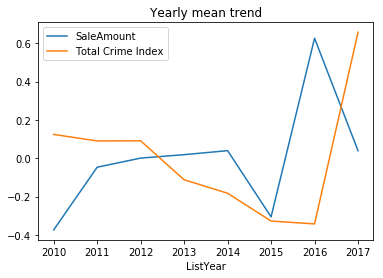

In [114]:
yearlyTrendDfNorm = normalizeDf(yearlyTrendDf)
yearlyTrendDfNorm.plot()
plt.title('Yearly mean trend')
plt.show()

In [116]:
yearlyTrendDfSaleAmount = mergedDf.groupby(mergedDf.ListYear)['SaleAmount'].median().reset_index()
yearlyTrendDfCrimeIndex = newCrimeDf.groupby(newCrimeDf.Year)['Total Crime Index'].median().reset_index()

medianyearlyTrendDf = pd.merge(yearlyTrendDfSaleAmount, yearlyTrendDfCrimeIndex,
                         how = 'left', left_on = ['ListYear'],
                         right_on = ['Year']).drop('Year', axis = 1).set_index('ListYear')

medianyearlyTrendDf

,SaleAmount,Total Crime Index
ListYear,,
2010,206000.0,137.0
2011,210000.0,127.5
2012,219000.0,135.5
2013,205000.0,113.5
2014,212100.0,129.5
2015,207500.0,96.5
2016,225000.0,91.0
2017,225000.0,110.0


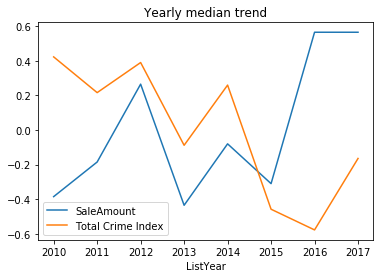

In [117]:
medianyearlyTrendDfNorm = normalizeDf(medianyearlyTrendDf)
medianyearlyTrendDfNorm.plot()
plt.title('Yearly median trend')
plt.show()

In [120]:
bridgeportSaleAmount = mergedDf[mergedDf.Town == 'Bridgeport'].groupby(mergedDf.ListYear)['SaleAmount'].median().reset_index()
bridgeportCrimeIndex = newCrimeDf[newCrimeDf.Town == 'Bridgeport'].groupby(newCrimeDf.Year)['Total Crime Index'].median().reset_index()
bridgeportYearlyTrend = pd.merge(bridgeportSaleAmount,bridgeportCrimeIndex,
                         how = 'left', left_on = ['ListYear'],
                         right_on = ['Year']).drop('Year', axis = 1).set_index('ListYear')



In [121]:
bridgeportYearlyTrendNorm = normalizeDf(bridgeportYearlyTrend)

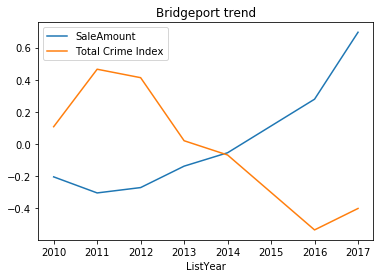

In [122]:
bridgeportYearlyTrendNorm.plot()
plt.title('Bridgeport trend')
plt.show()

In [134]:
townAvgMergedDf = mergedDf.groupby(mergedDf.Town)['SaleAmount'].mean().reset_index()
sortCrimeRateMergedDf = newCrimeDf.groupby(newCrimeDf.Town)['Total Crime Index'].mean().reset_index()
sortCrimeRateMergedDf = sortCrimeRateMergedDf.sort_values(by = ['Total Crime Index']).set_index('Town')
sortSaleAmountMergedDf = townAvgMergedDf.sort_values(by = ['SaleAmount'], ascending=False).set_index('Town')

In [135]:
sortCrimeRateMergedDf.head(10)


,Total Crime Index
Town,
Union,4.375
Hartland,6.750
Warren,7.000
Eastford,8.625
Colebrook,8.750
Canaan,9.125
Hampton,9.875
Bridgewater,10.125
Sherman,11.000


In [136]:
sortSaleAmountMergedDf.head(10)

,SaleAmount
Town,
Greenwich,1.952077e+06
Darien,1.633597e+06
Westport,1.484390e+06
New Canaan,1.454875e+06
Rocky Hill,1.331702e+06
Stamford,1.224630e+06
Wilton,8.521948e+05
Weston,8.365114e+05
Washington,8.062794e+05


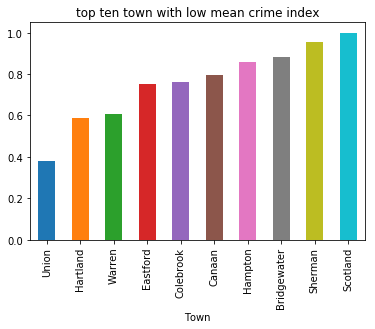

In [140]:
normalizeBar(sortCrimeRateMergedDf.head(10))['Total Crime Index'].plot.bar()
plt.title('top ten town with low mean crime index')
plt.show()

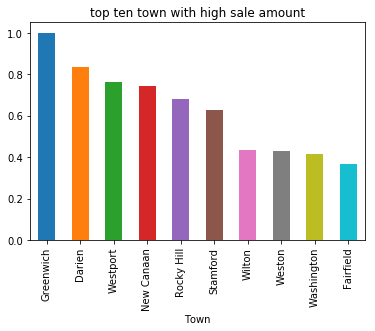

In [142]:
normalizeBar(sortSaleAmountMergedDf.head(10))['SaleAmount'].plot.bar()
plt.title('top ten town with high sale amount')
plt.show()

## Discussion
### Comparison between Yearly trend of SaleAmount and Total Crime Index

As seen in the line plots, there seems to be some correlation between Total Crime Index and SaleAmount. Roughly, when total crime index is decreasing, sale amount is increasing.


### Comparison between top 10 towns with low total crime index and high sale amount
From the bar diagrams, it is seen that no towns belong to both groups. So, it cannot be said that having low crime index is the sole cause for increase in sale amount. Maybe, rural areas have low crime index as well as low sale amount whereas urban areas may have high sale amount along with comparatively high crime index.